# Calling Tantangara WOfS data

# Loading the modules we need to work with WOfS data

In [1]:
#Firstly, we have to install the python 3 modules that let us communicate with our operating system

import sys
import os

In [2]:
#Now let's import some python 3 modules that let us work with numbers, run background equations and make plots
#np and pd are what everyone uses as short hand for these modules, so we should stick with those

import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

In [3]:
#We also want to get some special modules from our operating system to work with our datacube

import datacube
from datacube.utils import geometry 
from datacube.utils.geometry import CRS
from datacube.storage import masking
from datacube.helpers import ga_pq_fuser, write_geotiff
from digitalearthau.utils import wofs_fuser #wofs_fuser puts the tiles for the same time point together

In [4]:
#We have to add the plotting tools to the directory list with path.append
sys.path.append('../10_Scripts/')
import DEAPlotting, DEADataHandling

#ignore datacube warnings (needs to be last import statement)
import warnings
warnings.filterwarnings('ignore', module='datacube')

In [5]:


%load_ext autoreload

%autoreload 2

# Now choose where this will all be saved

In [7]:
#save files to your home directory (add your outpath here if you want to change it)
savefilepath = '/g/data/r78/kd6095/dea-notebooks'

#and name the file
savefilepath + 'Tantangara_WOfS'

'/g/data/r78/kd6095/dea-notebooksTantangara_WOfS'

# Let's have a look at what WOfS datasets we have

In [8]:
#We have to go into the data cube and get the data to do with WOfS
dc = datacube.Datacube(app='dc-WOfS')

#We want to list the products
products = dc.list_products()

#We have to use the pandas module and tell it to make a table
pd.set_option('display.max_colwidth', -1)
display_columns = ['name', 'description']
dc_products = products[display_columns]

#We want to see datasets where the 'name' contains 'wofs'
dc_products[dc_products['name'].str.contains("wofs")]

,name,description
id,,
77,wofs_albers,Historic Flood Mapping Water Observations from Space
97,wofs_annual_summary,Water Observations from Space Annual Statistics
100,wofs_apr_oct_summary,Water Observations from Space April to October Statistics
85,wofs_filtered_summary,Water Observations from Space Statistics confidence filtered
101,wofs_nov_mar_summary,Water Observations from Space November to March Statistics
84,wofs_summary,Water Observations from Space Statistics


Great, we want the wofs_filtered_summary dataset

# OK let's load the Tantangara WOfS data!!!

In [25]:
# The latitude for the middle of Tantangara dam is 35.75 S, and the longtitude is 148.66 E. Set buffer to 6500. 
# The buffer is how much space around the coordinates you want to show on the map
lat, lon, buffer = -35.75, 148.66, 6500

# The CRS is the coordinate reference system number. For Australia it is EPSG:3577
x, y = geometry.point(lon, lat, CRS('WGS84')).to_crs(CRS('EPSG:3577')).points[0]

# Now we've set the lat and long, we need to set the third dimension, time.
query = {'x': (x - buffer, x + buffer),
         'y': (y - buffer, y + buffer),    
         #'time': ('1999-01-01', '2019-01-01'),
         'time': ('1999-01-01', '2015-01-01','2019-07-01'),
         'crs': 'EPSG:3577'}

In [26]:
# OK we're going to see where we are in the dataset by showing the query.

# Now, this line of code USED to be the following:
# wofs_filtered_summary= dc.load(product = 'wofs_filtered_summary',fuse_func = wofs_fuser, **query)

# However, there seems to be a problem with the wofs_fuser. Erin found a fix using group_by = 'solar_day' instead
# But we better ask Bex why the fuser isn't working.... 

wofs_filtered_summary= dc.load(product = 'wofs_filtered_summary', group_by = 'solar_day', **query)

#This is the print command for the summary
wofs_filtered_summary

<xarray.Dataset>
Dimensions:                (time: 1, x: 521, y: 521)
Coordinates:
  * time                   (time) datetime64[ns] 2018-08-07T18:16:11.135475
  * y                      (y) float64 -3.997e+06 -3.997e+06 ... -4.01e+06
  * x                      (x) float64 1.495e+06 1.495e+06 ... 1.508e+06
Data variables:
    confidence             (time, y, x) float32 0.00030722655 ... 2.4492383e-05
    wofs_filtered_summary  (time, y, x) float32 -1.0 -1.0 -1.0 ... -1.0 -1.0
Attributes:
    crs:      EPSG:3577

The interesting part to note is the depth of the time dimension 

# Let's have a look at the confidence layer

The WOfS filtered summary has two variables: the confidence layer and the filtered summary. 
If we plot the WOfS filtered summary layer we can see areas that have been removed because 
the confidence value is below 10% (they're blue)

We are plotting the confidence layer. Next we will plot the %wet time. 

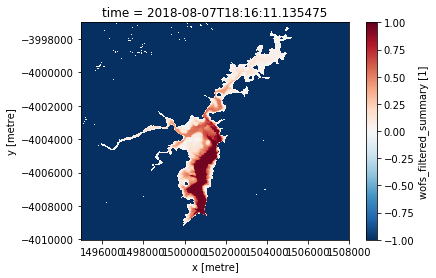

In [27]:
# OK lets plot it with the .plot() function!
wofs_filtered_summary.wofs_filtered_summary.isel(time=0).plot()

# Now let's plot the WOfS data for % of the time an area was wet

xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step


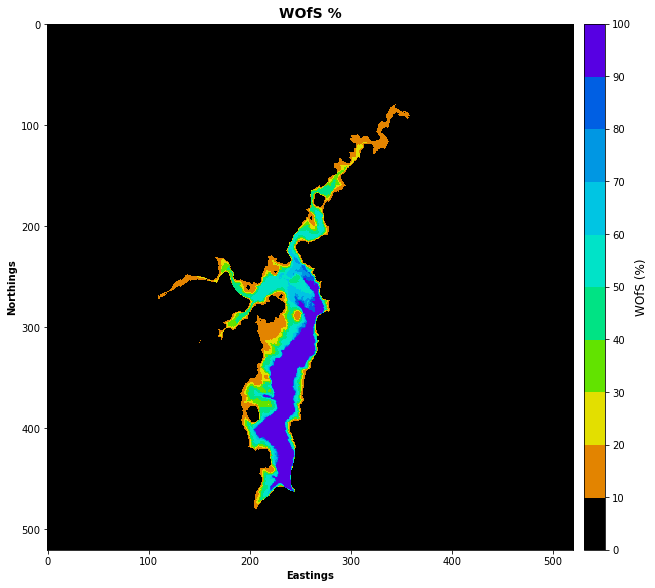

In [28]:
#this contains a sneaky workaround - currently plot_WOfS is expecting values from 0 to 100
DEAPlotting.plot_WOfS(wofs_filtered_summary.wofs_filtered_summary.isel(time=0)*100)
#ignore the error message about spatial data.. 
#save your image
plt.savefig(savefilepath + 'Tantangara_WOfS_image.png')

Wow that's a nice picture of Tantangara, good job.

# Nice, you plotted Tantangara dam on WOfS!!